### 📊 Tabela de Atributos da Pesquisa – Redes Sociais e Bem-estar

| **Variável**                       | **Tipo**       | **Descrição**                                                                      |
|-----------------------------------|----------------|------------------------------------------------------------------------------------|
| Idade                             | Inteiro        | Idade em anos                                                                      |
| Gênero                            | Categórico     | Macho ou fêmea                                                                     |
| Nível acadêmico                   | Categórico     | Ensino Médio / Graduação / Pós-Graduação                                           |
| País                              | Categórico     | País de Residência                                                                 |
| Horas_Média_de_Uso_Diário         | Flutuador      | Média de horas por dia nas redes sociais                                           |
| Plataforma_mais_usada            | Categórico     | Instagram, Facebook, TikTok, etc.                                                  |
| Afeta o desempenho acadêmico      | Booleano       | Impacto auto-relatado nos estudos (Sim/Não)                                        |
| Horas_de_sono_por_noite           | Flutuador      | Média de horas de sono noturno                                                     |
| Pontuação de Saúde Mental         | Inteiro        | Autoavaliação da saúde mental (1 = ruim a 10 = excelente)                          |
| Status de relacionamento          | Categórico     | Solteiro / Em um relacionamento / Complicado                                       |
| Conflitos_nas_Mídias_Sociais      | Inteiro        | Número de conflitos de relacionamento devido às mídias sociais                     |
| Pontuação_viciada                 | Inteiro        | Pontuação de vício em mídia social (1 = baixo a 10 = alto)                         |


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.shape

(705, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [13]:
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,20.661932,4.918324,6.869460,6.227273,2.849432,6.434659
std,1.398811,1.258244,1.127563,1.105808,0.958632,1.587197
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.750000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [11]:
df.drop(columns=["Student_ID"], inplace=True)

# EDA

## Numéricas

In [17]:
numericas = df.select_dtypes(include=["number"]).columns

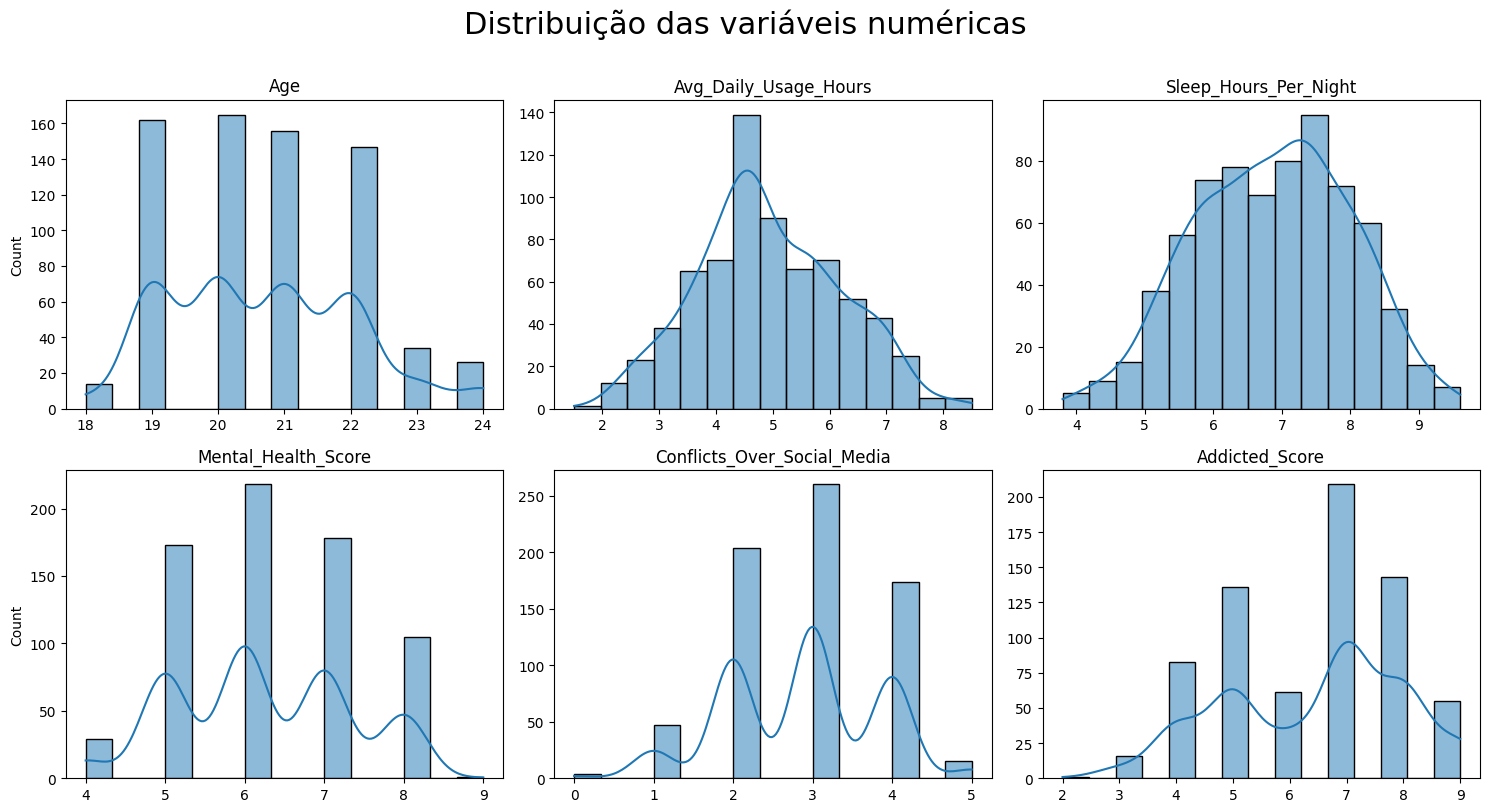

In [35]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.histplot(df[col], ax=ax[i], kde=True, bins=15)
    ax[i].set_title(f"{col}")
    
    ax[i].set_xlabel("")
    if i not in[0, 3]:
        ax[i].set_ylabel("")

plt.suptitle("Distribuição das variáveis numéricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Categóricas

In [37]:
categoricas = df.select_dtypes(exclude=["number"]).columns

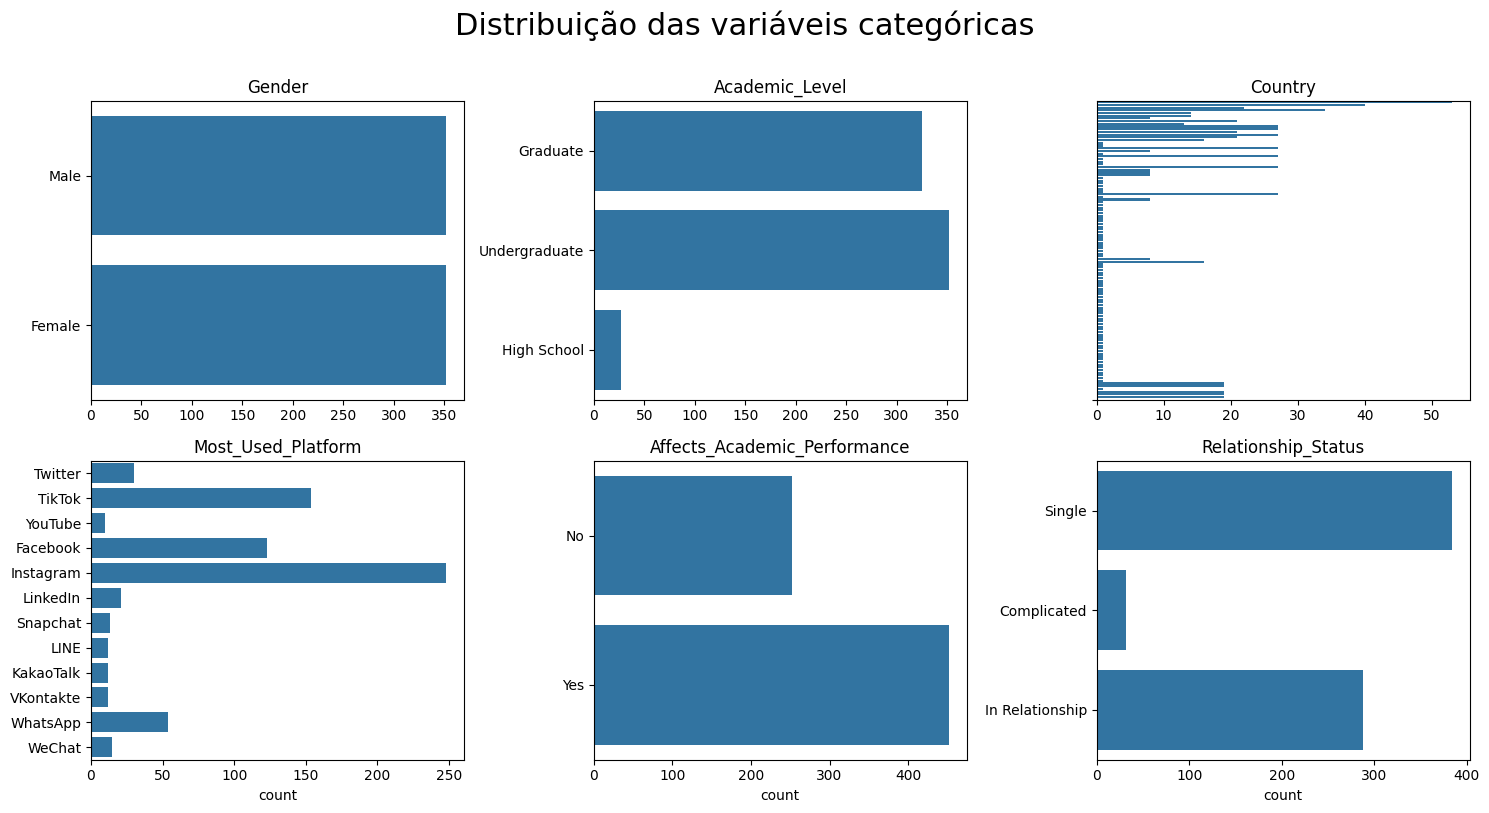

In [52]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(df, y=col, ax=ax[i])
    ax[i].set_title(f"{col}")
    
    ax[i].set_ylabel("")
    if col == "Country":
        ax[i].set_yticks("")
        
    if i not in [3, 4, 5]:
        ax[i].set_xlabel("")
        
for i in range(len(categoricas), len(ax)):
    fig.delaxes(ax[i])

plt.suptitle("Distribuição das variáveis categóricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Horas de Estudo + Vicios + Saude Mental

In [53]:
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9


<Axes: xlabel='Avg_Daily_Usage_Hours', ylabel='Mental_Health_Score'>

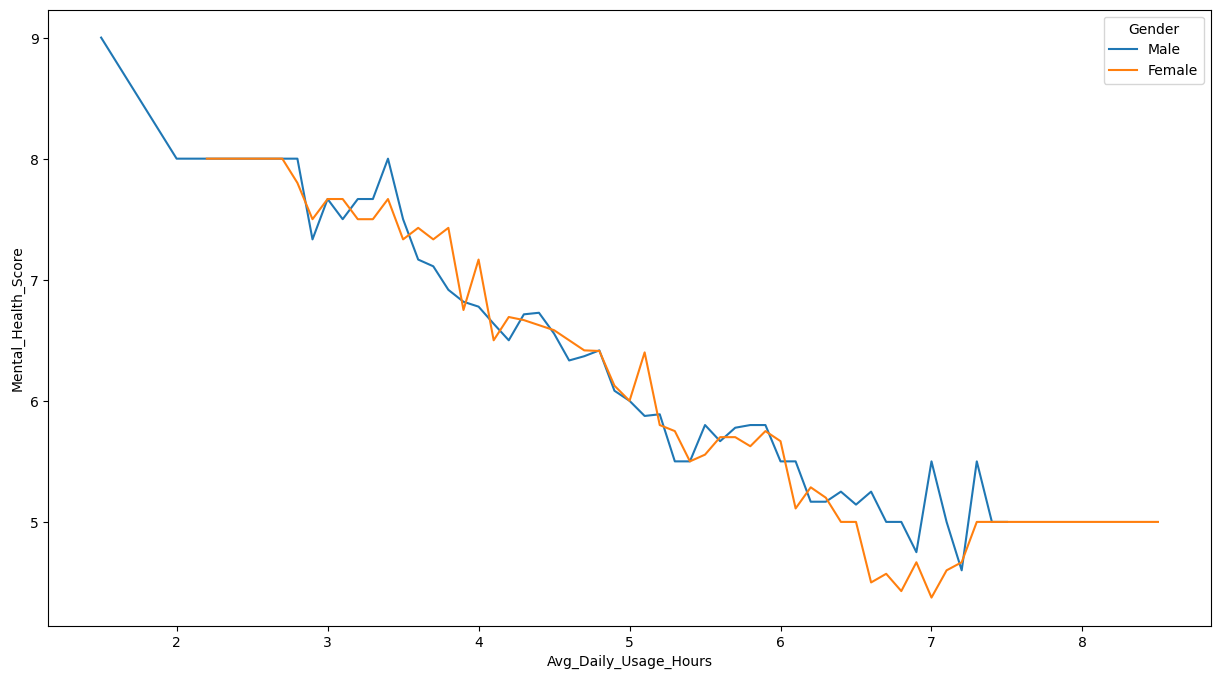

In [59]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Mental_Health_Score", hue="Gender", errorbar=None)